<a href="https://colab.research.google.com/github/Anshu366651/Handwritten-Digit-Recognizer/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

np.random.seed(42)
tf.random.set_seed(42)

print(tf.__version__)


2.19.0


In [2]:
# MNIST: 60k training + 10k test, 28x28 grayscale digits (0–9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)


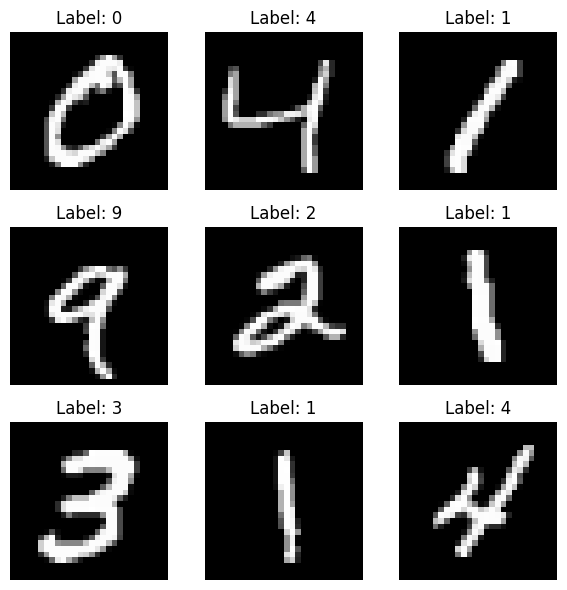

In [3]:
plt.figure(figsize=(6,6))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [4]:
# Scale pixels to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Add channel dimension for CNNs: (H, W) -> (H, W, 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test,  -1)

num_classes = 10
input_shape = (28, 28, 1)

print("x_train:", x_train.shape, "x_test:", x_test.shape)


x_train: (60000, 28, 28, 1) x_test: (10000, 28, 28, 1)


In [5]:
def build_model():
    model = keras.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, kernel_size=3, activation="relu"),
        layers.MaxPooling2D(),

        layers.Conv2D(64, kernel_size=3, activation="relu"),
        layers.MaxPooling2D(),

        layers.Conv2D(128, kernel_size=3, activation="relu"),
        layers.Flatten(),

        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ])
    return model

model = build_model()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",  # labels are integers (0–9)
    metrics=["accuracy"]
)

In [8]:
checkpoint_path = "mnist_cnn.keras"

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=3,
        restore_best_weights=True
    ),
    keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        monitor="val_accuracy",
        save_best_only=True
    )
]

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/15
422/422 - 41s - 97ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9898 - val_loss: 0.0370
Epoch 2/15
422/422 - 81s - 193ms/step - accuracy: 0.9927 - loss: 0.0229 - val_accuracy: 0.9907 - val_loss: 0.0404
Epoch 3/15
422/422 - 41s - 96ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.9902 - val_loss: 0.0379
Epoch 4/15
422/422 - 41s - 98ms/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 0.9910 - val_loss: 0.0369
Epoch 5/15
422/422 - 40s - 96ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9898 - val_loss: 0.0436
Epoch 6/15
422/422 - 41s - 97ms/step - accuracy: 0.9955 - loss: 0.0132 - val_accuracy: 0.9927 - val_loss: 0.0362
Epoch 7/15
422/422 - 41s - 97ms/step - accuracy: 0.9967 - loss: 0.0099 - val_accuracy: 0.9923 - val_loss: 0.0380
Epoch 8/15
422/422 - 41s - 97ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9912 - val_loss: 0.0381
Epoch 9/15
422/422 - 41s - 97ms/step - accuracy: 0.9973 - loss: 0.0082 - val_accuracy: 0.9915 -

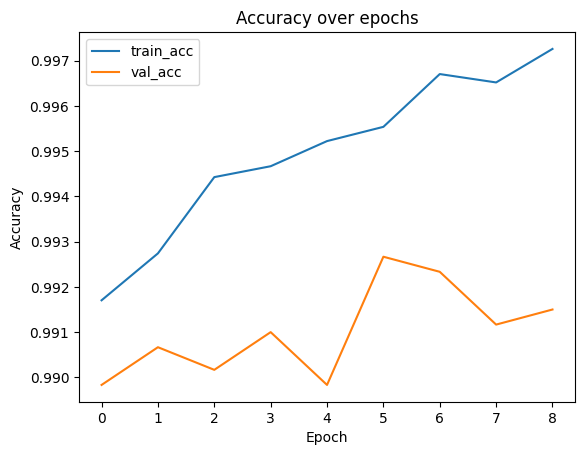

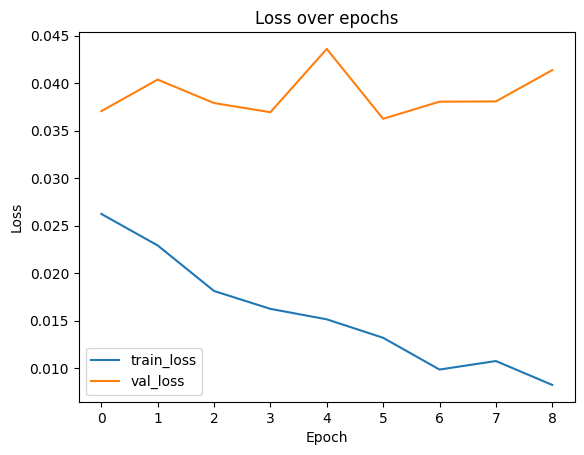

In [9]:
def plot_history(h):
    # Accuracy
    plt.figure()
    plt.plot(h.history["accuracy"], label="train_acc")
    plt.plot(h.history["val_accuracy"], label="val_acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy over epochs")
    plt.show()

    # Loss
    plt.figure()
    plt.plot(h.history["loss"], label="train_loss")
    plt.plot(h.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss over epochs")
    plt.show()

plot_history(history)


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")


Test accuracy: 0.9922 | Test loss: 0.0264


              precision    recall  f1-score   support

           0     0.9919    0.9969    0.9944       980
           1     0.9947    0.9965    0.9956      1135
           2     0.9884    0.9932    0.9908      1032
           3     0.9950    0.9901    0.9926      1010
           4     0.9889    0.9959    0.9924       982
           5     0.9932    0.9877    0.9904       892
           6     0.9969    0.9916    0.9942       958
           7     0.9855    0.9922    0.9889      1028
           8     0.9938    0.9928    0.9933       974
           9     0.9940    0.9841    0.9890      1009

    accuracy                         0.9922     10000
   macro avg     0.9922    0.9921    0.9922     10000
weighted avg     0.9922    0.9922    0.9922     10000



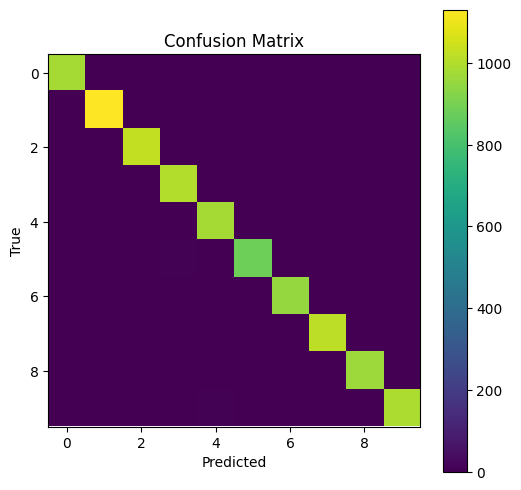

In [11]:
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()


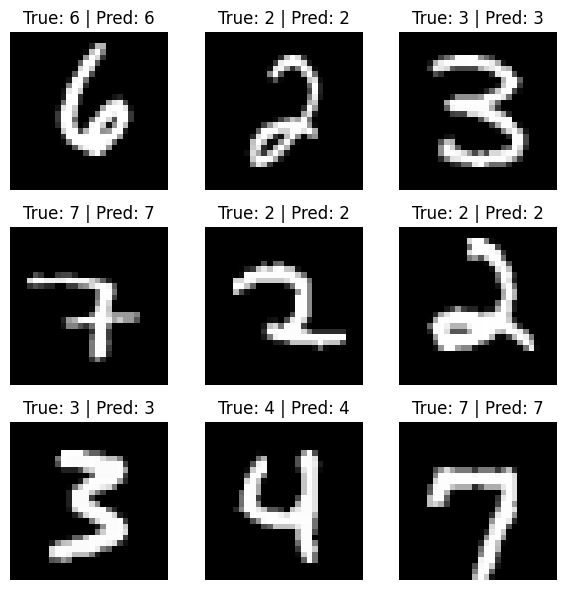

In [12]:
idx = np.random.choice(len(x_test), size=9, replace=False)
images = x_test[idx]
labels = y_test[idx]
preds = np.argmax(model.predict(images, verbose=0), axis=1)

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"True: {labels[i]} | Pred: {preds[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [13]:
model.save("mnist_cnn_final.keras")

# Example: load later
# reloaded = keras.models.load_model("mnist_cnn_final.keras")
# reloaded.evaluate(x_test, y_test)


In [15]:
def preprocess_external_image(path):

    img = Image.open(path).convert("L").resize((28, 28))
    arr = np.array(img).astype("float32")

    # Normalize to [0,1]
    arr = arr / 255.0

    # Auto-invert: if background is bright (mean > 0.5), invert
    if arr.mean() > 0.5:
        arr = 1.0 - arr

    # Optional: simple threshold/contrast stretch (uncomment if needed)
    # arr = (arr - arr.min()) / (arr.max() - arr.min() + 1e-7)

    arr = np.expand_dims(arr, axis=(0, -1))  # shape (1, 28, 28, 1)
    return arr

# Example usage:
custom = preprocess_external_image("/content/mnistpic.webp")
probs = model.predict(custom)[0]
pred  = probs.argmax()
print("Predicted digit:", pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 7


Predicted digit: 7


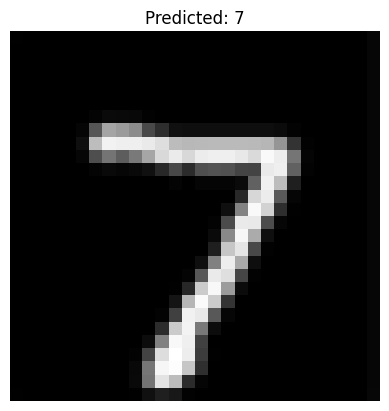

7

In [16]:
def predict_image(path):
    x = preprocess_external_image(path)
    probs = model.predict(x, verbose=0)[0]
    pred = int(np.argmax(probs))
    print("Predicted digit:", pred)
    # Show the image you fed in (post-processed)
    plt.figure()
    plt.imshow(x[0].squeeze(), cmap="gray")
    plt.title(f"Predicted: {pred}")
    plt.axis("off")
    plt.show()
    return pred

predict_image("/content/mnistpic.webp")